In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read our dataset
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Shape of the dataset
print('Number of rows ', data.shape[0])
print('Number of columns ', data.shape[1])

Number of rows  1000
Number of columns  8


In [5]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Check missing values
print('Any missing values ', data.isnull().values.any())

Any missing values  False


In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# Basic information of the data set, min, max, mean, etc
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<AxesSubplot:xlabel='math score', ylabel='count'>

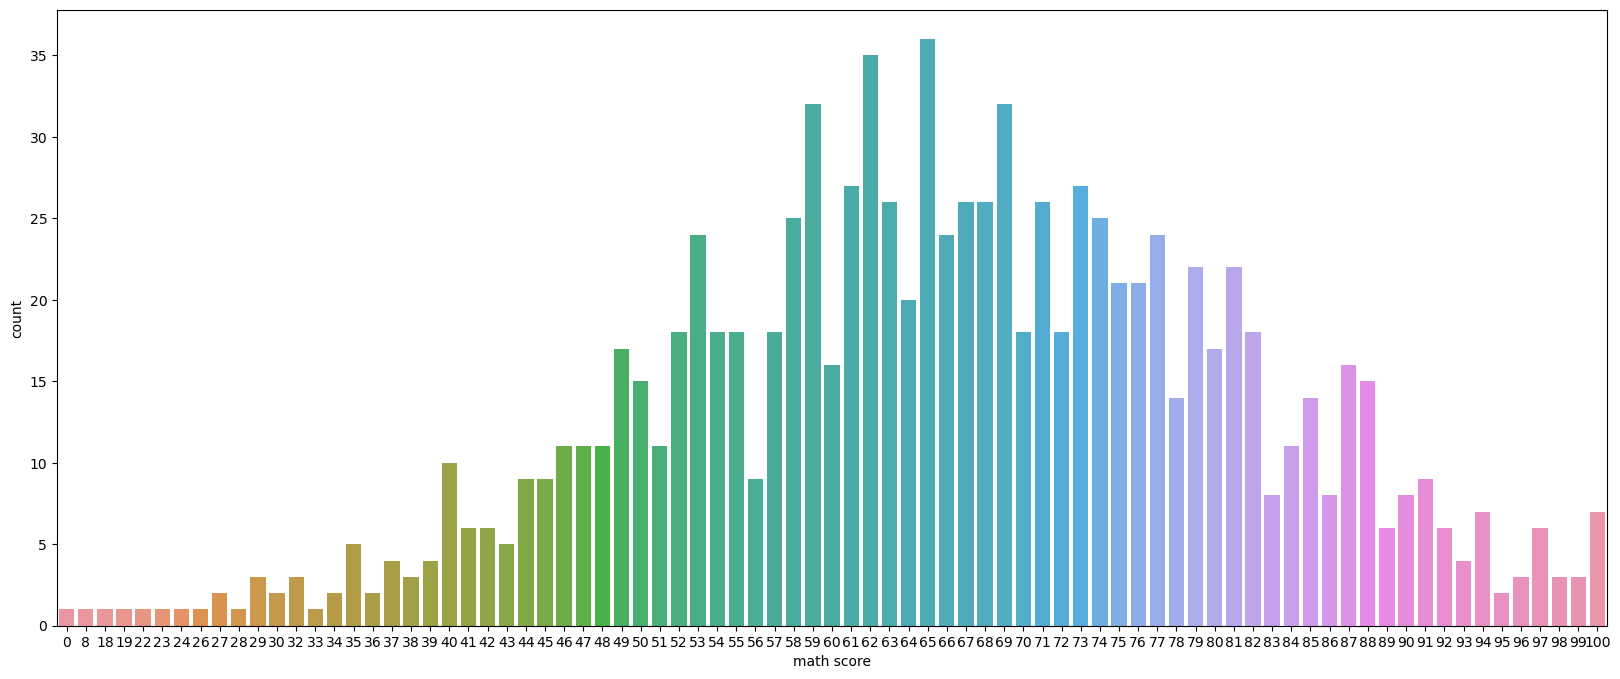

In [9]:
# Explore Math score
plt.figure(figsize=(20,8))
sns.countplot(x = data['math score'])


In [10]:
# minimum marks is 51 to pass in a exam

data['Math_PassStatus'] = np.where(data['math score']<51, 'F', 'P')
data['Math_PassStatus'].value_counts()

P    850
F    150
Name: Math_PassStatus, dtype: int64

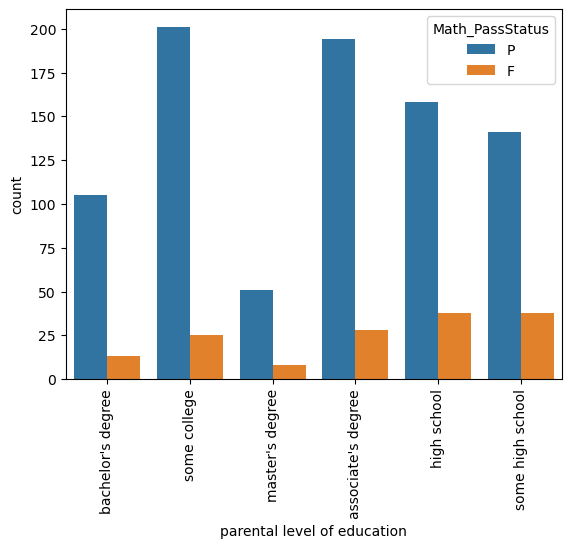

In [11]:
sns.countplot(x='parental level of education', data = data, hue='Math_PassStatus')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='reading score', ylabel='count'>

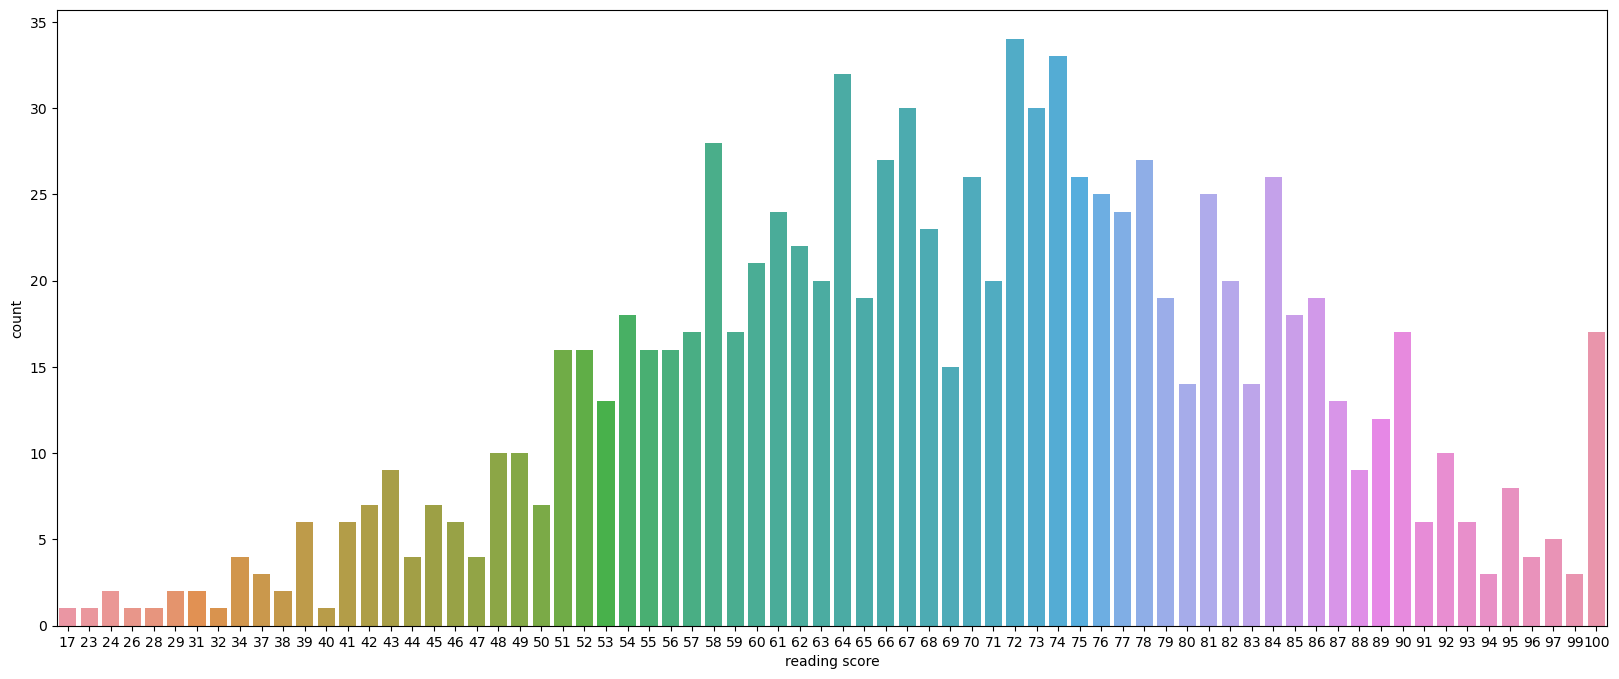

In [12]:
# Explore Reading score
plt.figure(figsize=(20,8))
sns.countplot(x = data['reading score'])


In [13]:
# minimum marks is 51 to pass in a exam

data['Reading_PassStatus'] = np.where(data['reading score']<51, 'F', 'P')
data['Reading_PassStatus'].value_counts()

P    903
F     97
Name: Reading_PassStatus, dtype: int64

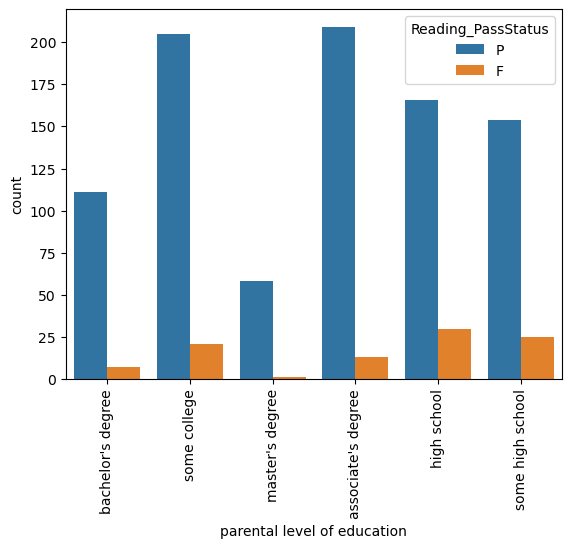

In [14]:
sns.countplot(x='parental level of education', data = data, hue='Reading_PassStatus')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='writing score', ylabel='count'>

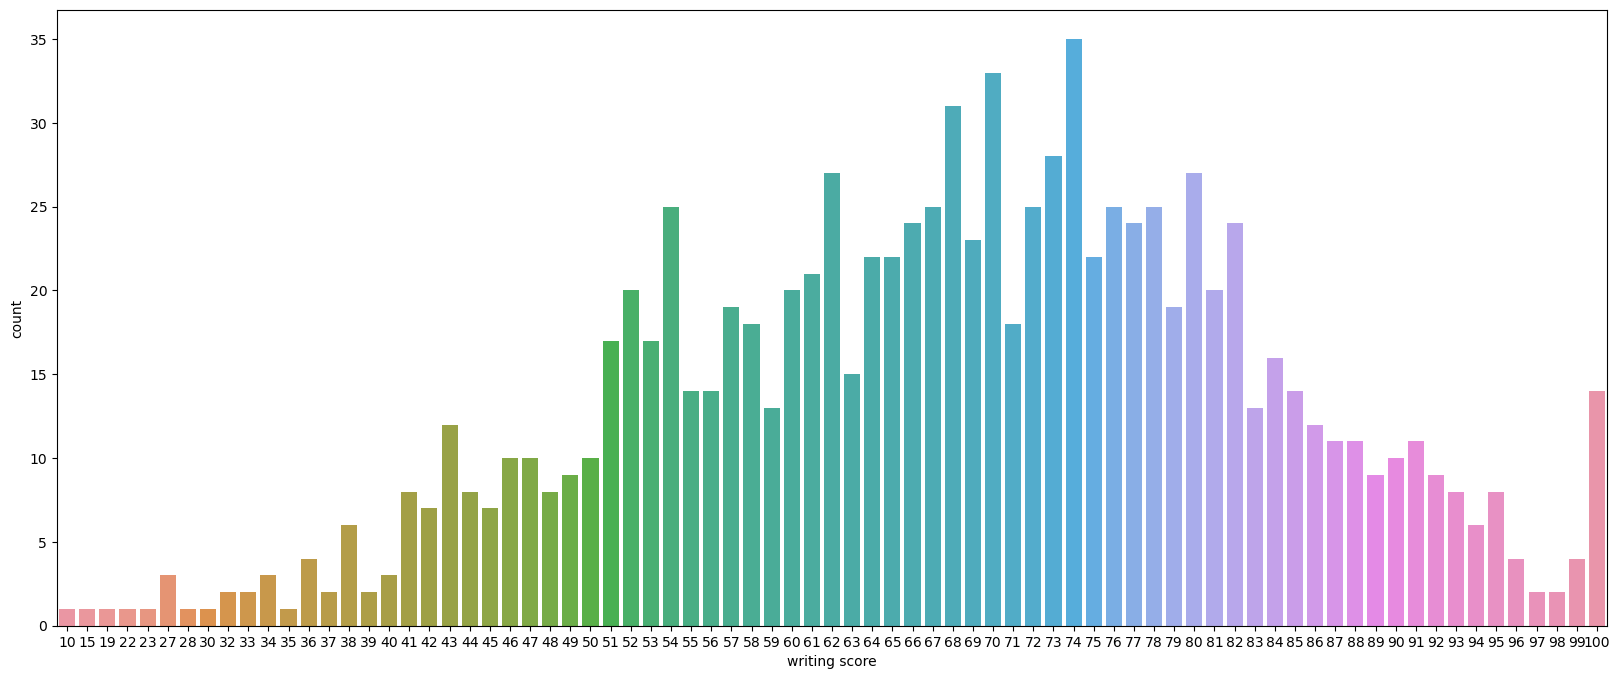

In [15]:
# Explore Writing score
plt.figure(figsize=(20,8))
sns.countplot(x = data['writing score'])


In [16]:
# minimum marks is 51 to pass in a exam

data['Writing_PassStatus'] = np.where(data['writing score']<51, 'F', 'P')
data['Writing_PassStatus'].value_counts()

P    876
F    124
Name: Writing_PassStatus, dtype: int64

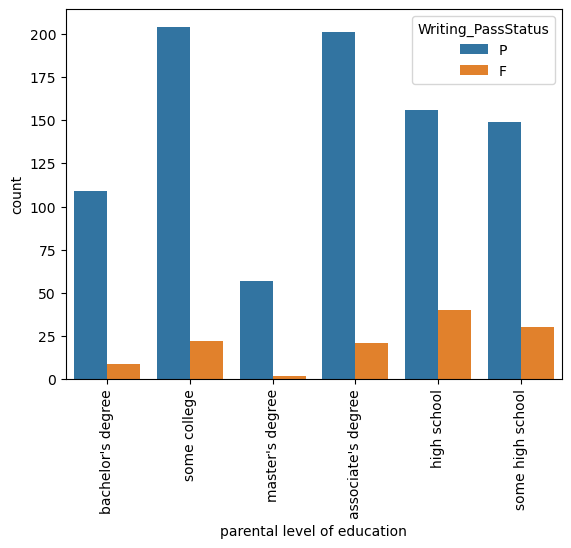

In [17]:
sns.countplot(x='parental level of education', data = data, hue='Writing_PassStatus')
plt.xticks(rotation=90)
plt.show()

In [49]:
# How many students passed in all the subjects ?

In [63]:
def conditions(row):
    if row['Math_PassStatus'] == "F" or row['Reading_PassStatus'] == "F" or row['Writing_PassStatus'] == "F":
        val = 'F'
    else:
        val = 'P'
    return val

#Apply the function to each data point in the data frame
data['OverAll_PassStatus']= data.apply(conditions, axis=1)

In [67]:
data.OverAll_PassStatus.value_counts()

P    796
F    204
Name: OverAll_PassStatus, dtype: int64

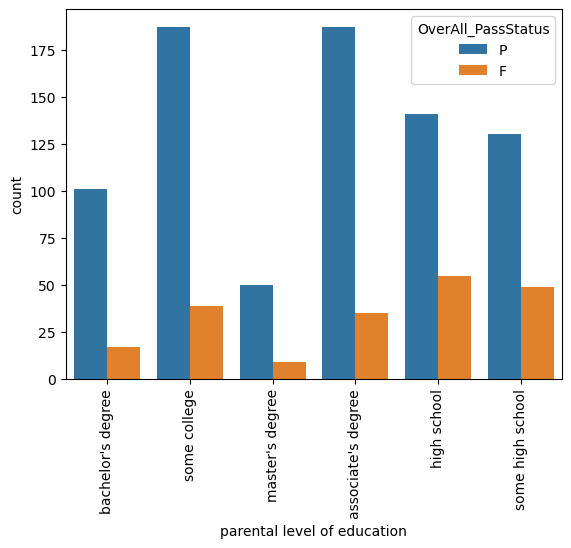

In [68]:
sns.countplot(x='parental level of education', data = data, hue='OverAll_PassStatus')
plt.xticks(rotation=90)
plt.show()

In [74]:
# Average student makr
data['Total_Marks'] = data['math score']+data['reading score']+data['writing score']
data['Percentage'] = data['Total_Marks']/3

In [79]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333


In [78]:
# Convert Average student makr to A, B, C, D, E, F

In [80]:
# Grading
# above 91 = A Grade
# 81 to 91 = B Grade
# 71 to 81 = C Grade
# 61 to 71 = D Grade
# 51 to 60 = E Grade
# below 51 = F Grade

In [82]:
def GetGrade(x):
    if (x['OverAll_PassStatus'] == 'F'):
        return 'F'    
    if ( x['Percentage'] >= 91 ):
        return 'A'
    if (  x['Percentage'] >= 81):
        return 'B'
    if (  x['Percentage'] >= 71):
        return 'C'
    if (  x['Percentage'] >= 61):
        return 'D'
    if (  x['Percentage'] >= 51):
        return 'E'
    else: 
        return 'F'

data['Grade'] = data.apply(GetGrade, axis=1)

In [83]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,148,49.333333,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,C


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grade', ylabel='count'>

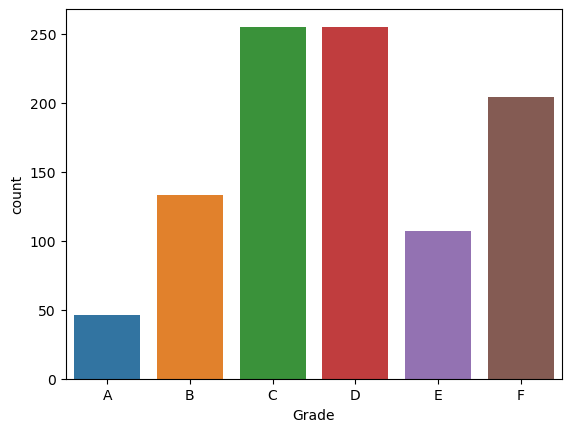

In [85]:
sns.countplot(data['Grade'], order=['A','B','C','D','E','F'])

In [86]:
# Mean marks
data['Percentage'].mean()

67.77066666666664

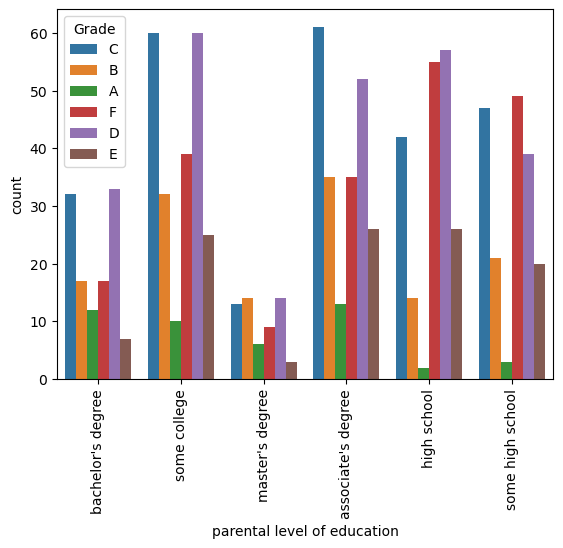

In [88]:
sns.countplot(x='parental level of education', data = data, hue='Grade')
plt.xticks(rotation=90)
plt.show()

In [92]:
# Dependens of grades on race
data.groupby('race/ethnicity').mean('Percentage')

,math score,reading score,writing score,Total_Marks,Percentage
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


In [ ]:
data